<a href="https://colab.research.google.com/github/ASWINSURESH666/Regression_Analysis/blob/main/Error_Surface_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [31]:
df = pd.read_csv("/content/Untitled spreadsheet - Sheet2.csv")
df.head()

,X,Y
0,-10,-38.5
1,-9,-35.5
2,-8,-30.5
3,-7,-30.5
4,-6,-24.5


In [32]:
X = df['X']
Y = df['Y']

In [33]:
m = np.arange(-10, 10, 0.1)
c = np.arange(-10, 10, 0.1)

mc_set = []
for _m in m:
    for _c in c:
        mc_set.append((_m, _c))

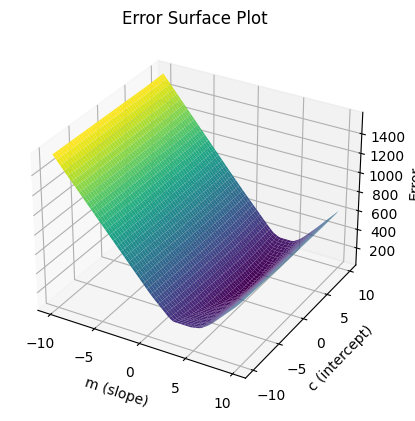

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv('/content/Untitled spreadsheet - Sheet2.csv')

# Define ranges for m and c
m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)

# Extract x and y values from the DataFrame
x_values = df.iloc[:, 0].values
y_values = df.iloc[:, 1].values

# Create a mesh grid for m and c values
M, C = np.meshgrid(m_values, c_values)
errors = np.zeros(M.shape)

# Calculate the errors
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        mi = M[i, j]
        ci = C[i, j]
        predicted_y = mi * x_values + ci
        errors[i, j] = np.sum(np.abs(y_values - predicted_y))  # Sum of absolute errors

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(M, C, errors, cmap='viridis')

# Set labels and title
ax.set_xlabel('m (slope)')
ax.set_ylabel('c (intercept)')
ax.set_zlabel('Error')
plt.title('Error Surface Plot')

# Show the plot
plt.show()

In [35]:
# prompt: now i want to use gradient descent algorithm to find the optimum m and c make the syaring values randomly from m and c set

import pandas as pd
import numpy as np
import random

# Load the data
df = pd.read_csv('/content/Untitled spreadsheet - Sheet2.csv')

# Extract x and y values from the DataFrame
x_values = df.iloc[:, 0].values
y_values = df.iloc[:, 1].values

# Define the learning rate and number of iterations
learning_rate = 0.001
num_iterations = 1000

# Initialize m and c randomly within the specified ranges
m = random.choice(m_values)
c = random.choice(c_values)

# Gradient Descent algorithm
for i in range(num_iterations):
    y_predicted = m * x_values + c
    error = y_values - y_predicted

    # Calculate gradients
    m_gradient = -2 * np.sum(error * x_values) / len(x_values)
    c_gradient = -2 * np.sum(error) / len(x_values)

    # Update m and c
    m = m - learning_rate * m_gradient
    c = c - learning_rate * c_gradient

print("Optimum m:", m)
print("Optimum c:", c)

# Calculate the error for the optimal m and c
y_predicted = m * x_values + c
error = y_values - y_predicted
mse = np.mean(error ** 2)

print("Mean Squared Error (MSE):", mse)


Optimum m: 4.196103896103902
Optimum c: 2.358923054922218
Mean Squared Error (MSE): 7.774613498571129


Iteration 1: m = 0.05238095238095238, c = 0.0004761904761904762, Error = 22.642857142857142
Iteration 2: m = 0.10476190476190476, c = 0.0009523809523809524, Error = 22.36845804988662
Iteration 3: m = 0.15714285714285714, c = 0.0014285714285714286, Error = 22.0940589569161
Iteration 4: m = 0.20952380952380953, c = 0.0019047619047619048, Error = 21.819659863945574
Iteration 5: m = 0.2619047619047619, c = 0.002380952380952381, Error = 21.545260770975055
Iteration 6: m = 0.3142857142857143, c = 0.0028571428571428576, Error = 21.270861678004536
Iteration 7: m = 0.36666666666666664, c = 0.003333333333333334, Error = 20.996462585034017
Iteration 8: m = 0.419047619047619, c = 0.0038095238095238104, Error = 20.722063492063494
Iteration 9: m = 0.47142857142857136, c = 0.004285714285714287, Error = 20.44766439909297
Iteration 10: m = 0.5238095238095237, c = 0.004761904761904763, Error = 20.17326530612245
Iteration 11: m = 0.5752380952380951, c = 0.0061904761904761916, Error = 19.900680272108843
I

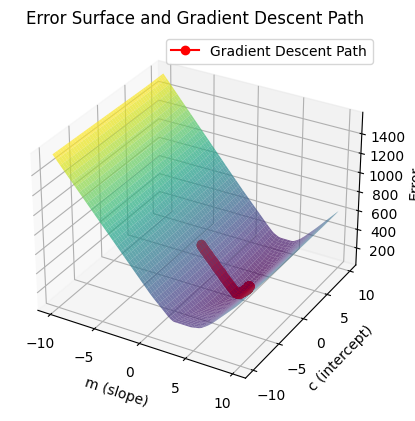

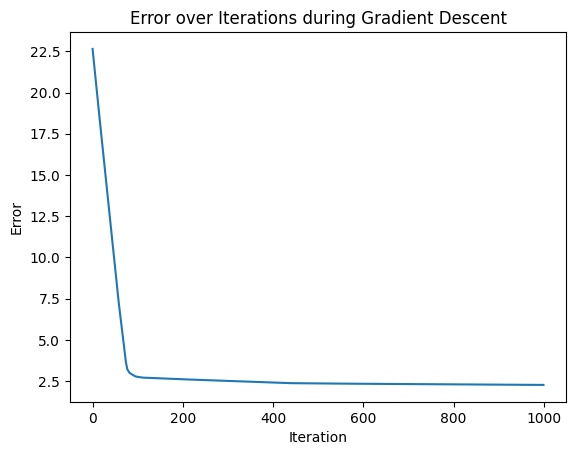

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv('/content/Untitled spreadsheet - Sheet2.csv')

# Define ranges for m and c
m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)

# Extract x and y values from the DataFrame
x_values = df.iloc[:, 0].values
y_values = df.iloc[:, 1].values

# Create a mesh grid for m and c values
M, C = np.meshgrid(m_values, c_values)
errors = np.zeros(M.shape)

# Calculate the errors for the entire grid
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        mi = M[i, j]
        ci = C[i, j]
        predicted_y = mi * x_values + ci
        errors[i, j] = np.sum(np.abs(y_values - predicted_y))  # Mean Absolute Error (MAE)

# Function to compute MAE and its gradients
def compute_error_and_gradients(m, c, x_values, y_values):
    N = len(y_values)
    predicted_y = m * x_values + c
    error = np.sum(np.abs(y_values - predicted_y)) / N  # Mean Absolute Error
    error_gradient_m = -np.sum(np.sign(y_values - predicted_y) * x_values) / N  # Gradient w.r.t. m
    error_gradient_c = -np.sum(np.sign(y_values - predicted_y)) / N  # Gradient w.r.t. c
    return error, error_gradient_m, error_gradient_c

# Gradient descent parameters
learning_rate = 0.01
num_iterations = 1000
m_current = 0  # Starting value for m (slope)
c_current = 0  # Starting value for c (intercept)

# To store the path of m and c values
m_history = [m_current]
c_history = [c_current]
error_history = []

# Gradient descent loop
for i in range(num_iterations):
    error, grad_m, grad_c = compute_error_and_gradients(m_current, c_current, x_values, y_values)
    m_current -= learning_rate * grad_m  # Update m
    c_current -= learning_rate * grad_c  # Update c

    # Save the values at each iteration for plotting
    m_history.append(m_current)
    c_history.append(c_current)
    error_history.append(error)
    print(f"Iteration {i+1}: m = {m_current}, c = {c_current}, Error = {error}")


# Create the 3D plot of the error surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, errors, cmap='viridis', alpha=0.7)

# Plot the path of gradient descent on the surface
m_history = np.array(m_history)
c_history = np.array(c_history)
error_path = np.zeros(m_history.shape)
for i in range(len(m_history)):
    predicted_y = m_history[i] * x_values + c_history[i]
    error_path[i] = np.sum(np.abs(y_values - predicted_y))  # Error at each step

ax.plot(m_history, c_history, error_path, color='r', marker='o', label='Gradient Descent Path')

# Set labels and title
ax.set_xlabel('m (slope)')
ax.set_ylabel('c (intercept)')
ax.set_zlabel('Error')
plt.title('Error Surface and Gradient Descent Path')
plt.legend()
plt.show()

# Plot error over iterations
plt.figure()
plt.plot(error_history)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error over Iterations during Gradient Descent')
plt.show()

In [37]:
# prompt: now using plotily make the exact 3d surface plot with gradient descent path interactive


# Create the 3D plot of the error surface
fig = go.Figure(data=[go.Surface(z=errors, x=M, y=C, colorscale='viridis', opacity=0.7)])

# Plot the path of gradient descent on the surface
fig.add_trace(go.Scatter3d(x=m_history, y=c_history, z=error_path,
                         mode='lines+markers',
                         marker=dict(size=4, color='red'),
                         line=dict(color='red', width=2),
                         name='Gradient Descent Path'))

# Set labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='m (slope)',
        yaxis_title='c (intercept)',
        zaxis_title='Error'),
    title='Error Surface and Gradient Descent Path',
    width=800,
    height=600
)

fig.show()
